In [2]:
from PIL import Image, ImageFilter
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

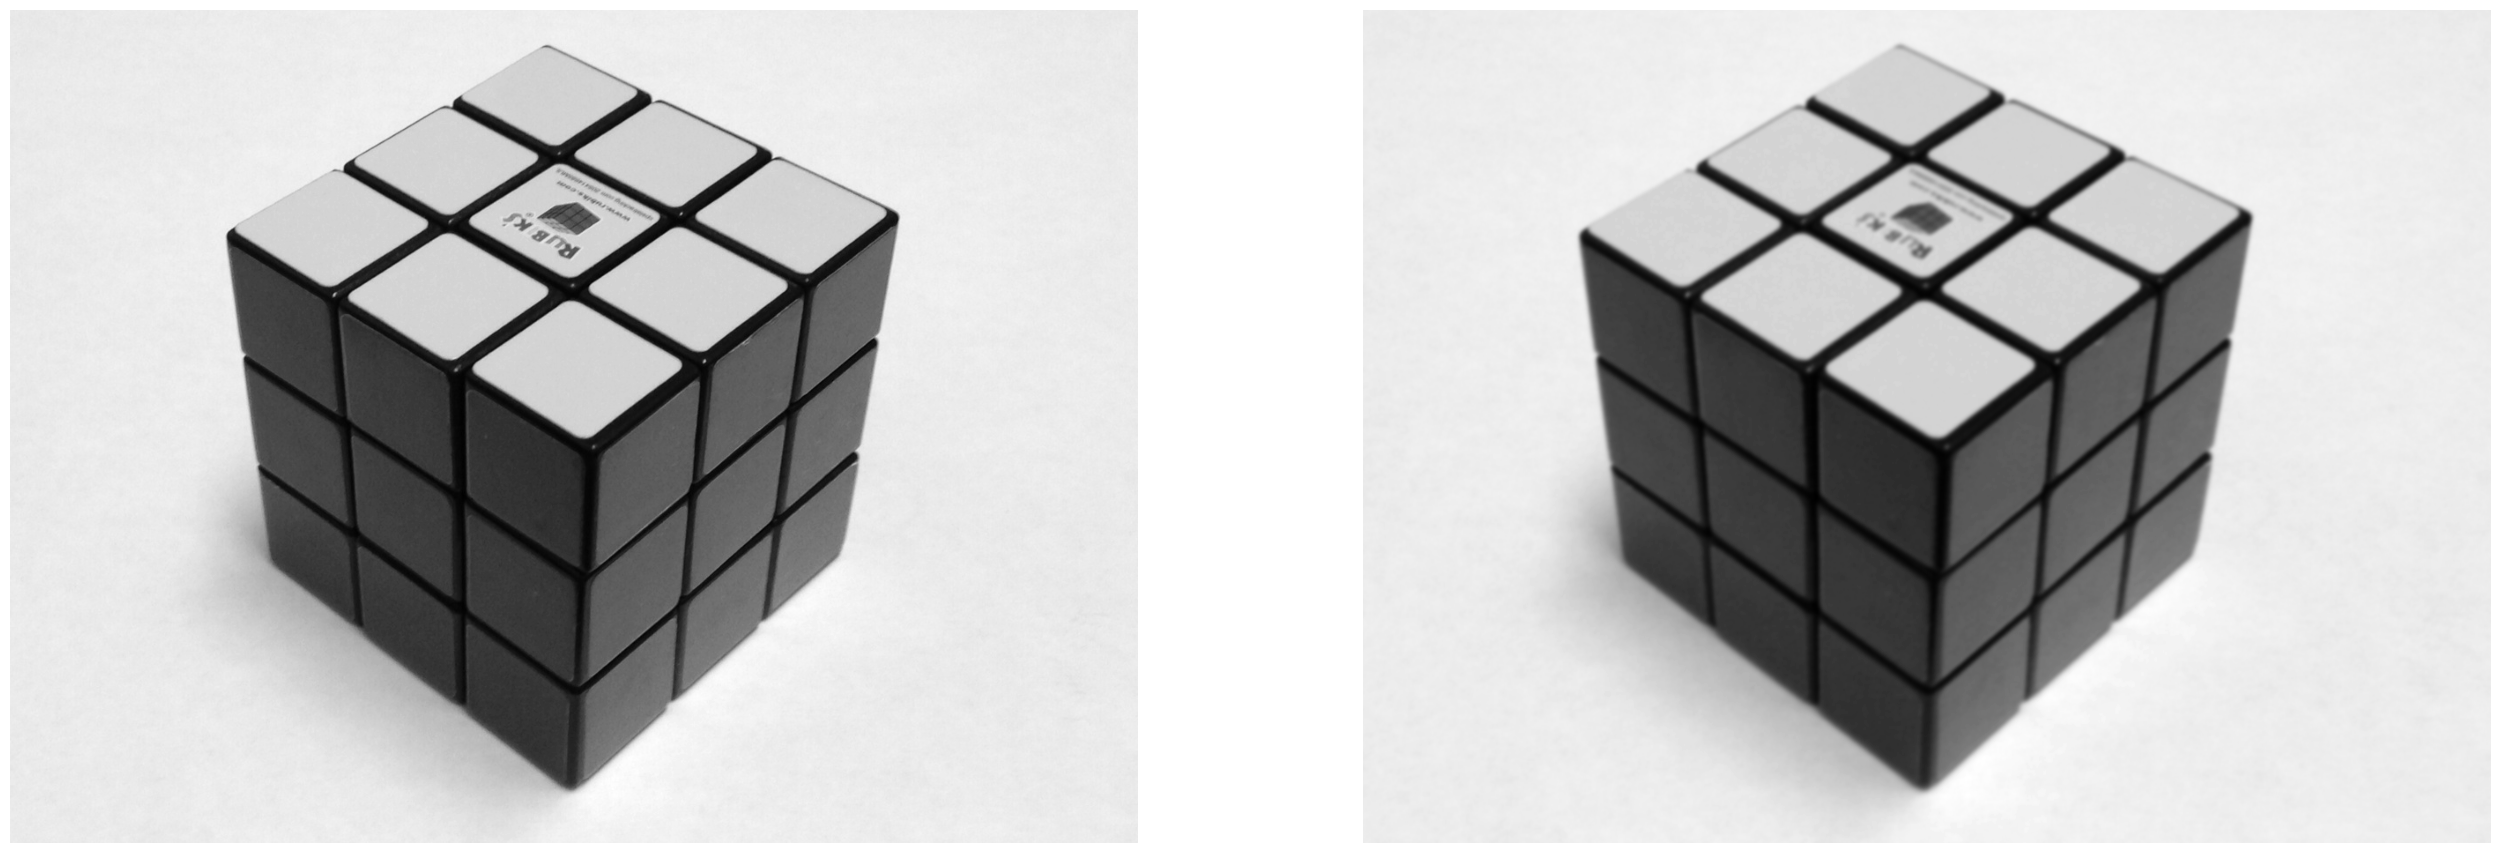

In [16]:
image = Image.open('./rubiks.jpg').convert('L')
smoothed_image = image.filter(ImageFilter.GaussianBlur(radius=2))
width, height = smoothed_image.size

fig, ax = plt.subplots(1, 2, figsize=(32, 16))

ax[0].imshow(image, cmap='gray')
ax[0].axis('off')

ax[1].imshow(smoothed_image, cmap='gray')
ax[1].axis('off')

plt.show()

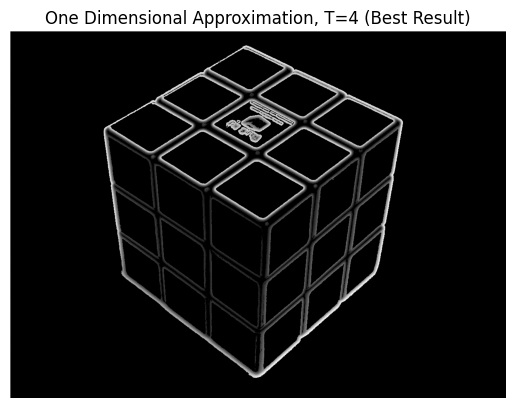

In [18]:
approximation1d_Mx = np.array([
    [-1, 1]
])

approximation1d_My = np.array([
    [-1],
    [1]
])

DetectEdges(smoothed_image, approximation1d_Mx, approximation1d_My, 4, 'One Dimensional Approximation, T=4 (Best Result)')

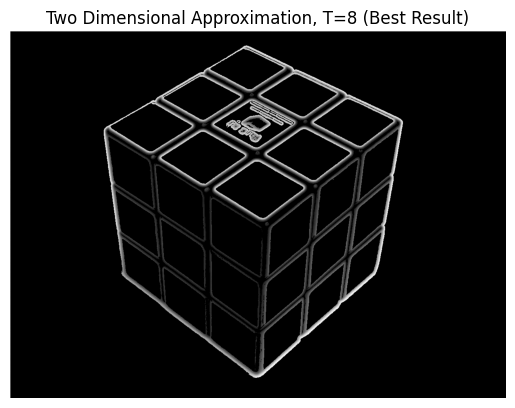

In [19]:
approximation2d_Mx = np.array([
    [-1, 1],
    [-1, 1]
])

approximation2d_My = np.array([
    [1, 1],
    [-1, -1]
])

DetectEdges(smoothed_image, approximation2d_Mx, approximation2d_My, 8, 'Two Dimensional Approximation, T=8 (Best Result)')

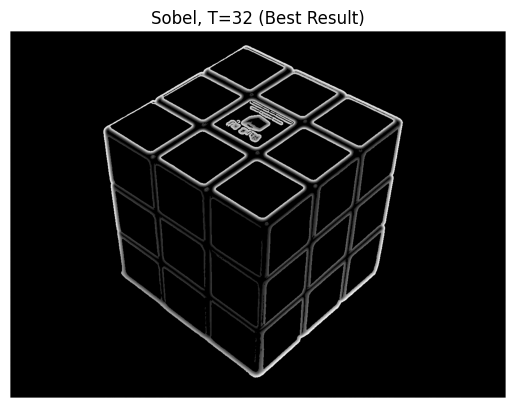

In [20]:
sobel_Mx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_My = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

DetectEdges(smoothed_image, sobel_Mx, sobel_My, 32, 'Sobel, T=32 (Best Result)')

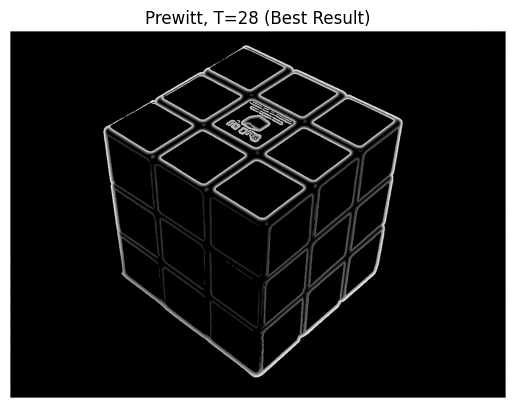

In [21]:
pixels = np.array(smoothed_image)

prewitt_Mx = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

prewitt_My = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

DetectEdges(smoothed_image, prewitt_Mx, prewitt_My, 28, 'Prewitt, T=28 (Best Result)')

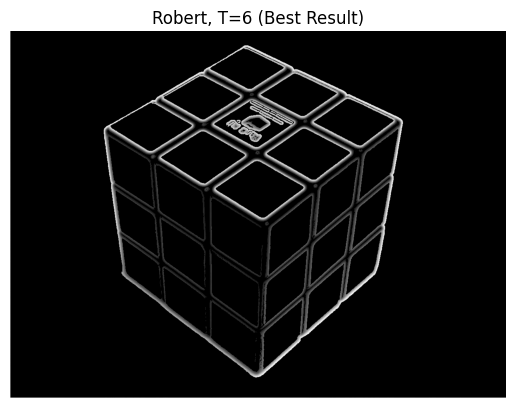

In [22]:
pixels = np.array(smoothed_image)

robert_Mx = np.array([
    [0, 0, -1],
    [0, 1, 0],
    [0, 0, 0]
])

robert_My = np.array([
    [0, -1, 0],
    [0, 0, 1],
    [0, 0, 0]
])

DetectEdges(smoothed_image, robert_Mx, robert_My, 6, 'Robert, T=6 (Best Result)')

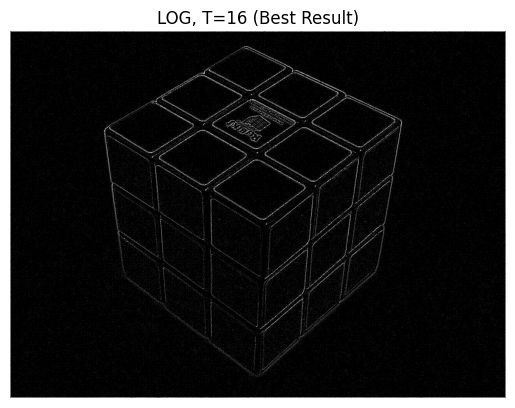

In [25]:
pixels = np.array(image)

log_kernel = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]
])

log_edges = convolve2d(pixels, log_kernel, mode='same', boundary='fill', fillvalue=0)
log_edges[log_edges < 16] = 0

reshaped_array = log_edges.reshape((height, width))
output = Image.fromarray(reshaped_array.astype('uint8'))

plt.imshow(output, cmap='gray')
plt.axis('off')
plt.title('LOG, T=16 (Best Result)')
plt.show()

In [24]:
def DetectEdges(image, Mx, My, T, title):
    pixels = np.array(image)

    gradient_Mx = convolve2d(pixels, Mx, mode='same', boundary='fill', fillvalue=0)
    gradient_My = convolve2d(pixels, My, mode='same', boundary='fill', fillvalue=0)

    for i in range(height):
        for j in range(width):
            magn = np.sqrt(gradient_Mx[i][j]**2 + gradient_My[i][j]**2)
            if (magn < T) : 
                pixels[i][j] = 0

    reshaped_array = pixels.reshape((height, width))
    output = Image.fromarray(reshaped_array.astype('uint8'))

    plt.imshow(output, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()